# Shape features
In this notebook we will compare the impact of small manual modifications to labels/outlines on measured shape features.

In [1]:
import numpy as np
import stackview
import napari_skimage_regionprops as nsr
from skimage.morphology import disk

For demonstration purposes, we use a blank image and  a circular region of interest.

In [2]:
image = np.zeros((50,50))

In [3]:
labels = np.zeros(image.shape, dtype=np.uint32)
labels[9:40, 9:40] = disk(15)

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
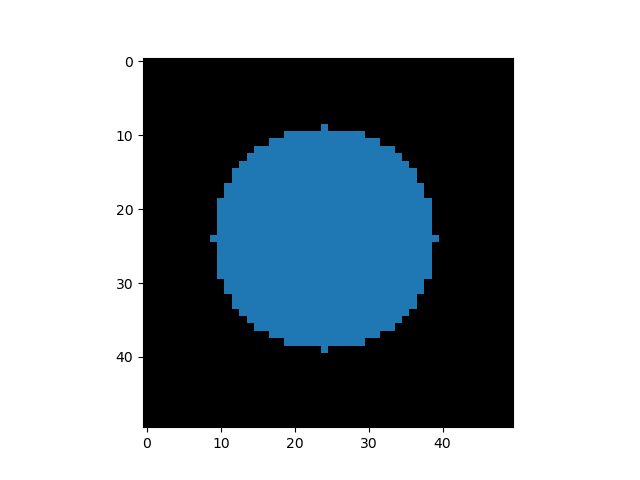

In [4]:
stackview.insight(labels)

We can print out the roundness and circularity of this single object like this:

In [5]:
stats = nsr.regionprops_table(image, labels, shape=True)

print("roundness: ", stats['roundness'][0])
print("circularity: ", stats['circularity'][0])

roundness:  0.9996522134693254
circularity:  0.9106696648110818


## Manual modification
When executing the next cell, a small user-interface will open that allows you to modify the object. Change the Eraser radius to 1 and hold the ALT-Key while clicking to remove individual pixels from the object.

In [9]:
stackview.annotate(image, labels, zoom_factor=4)

When you are done modifying the object, continue executing the next code cells.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
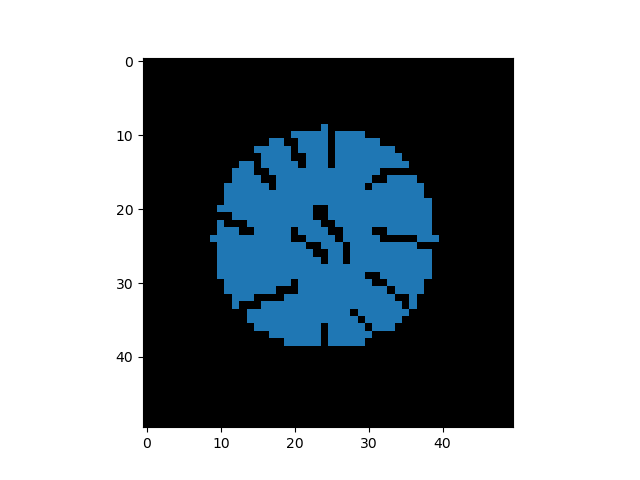

In [7]:
stackview.insight(labels)

As you can see, small modifications to the outline can have huge impact on individual metrics.

In [8]:
stats = nsr.regionprops_table(image, labels, shape=True)

print("roundness: ", stats['roundness'][0])
print("circularity: ", stats['circularity'][0])

roundness:  0.8564505192042108
circularity:  0.13777164107308135


## Exercise
Modify the code above to also measure aspect ratio and solidity.